In [98]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data = pd.read_csv("MTurker_Results_0407.csv")

In [3]:
stars = data.last_name.unique()

In [15]:
labels = data.label.unique()

In [16]:
labels

array(['beard', 'cheek', 'chin', 'ears', 'eyes', 'eye brows', 'hairline',
       'laugh line', 'lips', 'moustache', 'nose'], dtype=object)

In [13]:
data.loc[data['label'] == "eye", "label"] = "eyes"
data.loc[data['label'] == "laugh lines", "label"] = "laugh line"

In [19]:
with open("test_set_17_227.pkl", "rb") as handle:
    temp_faces = pickle.load(handle)
faces = {name.split()[-1]: temp_faces[name] for name in temp_faces}

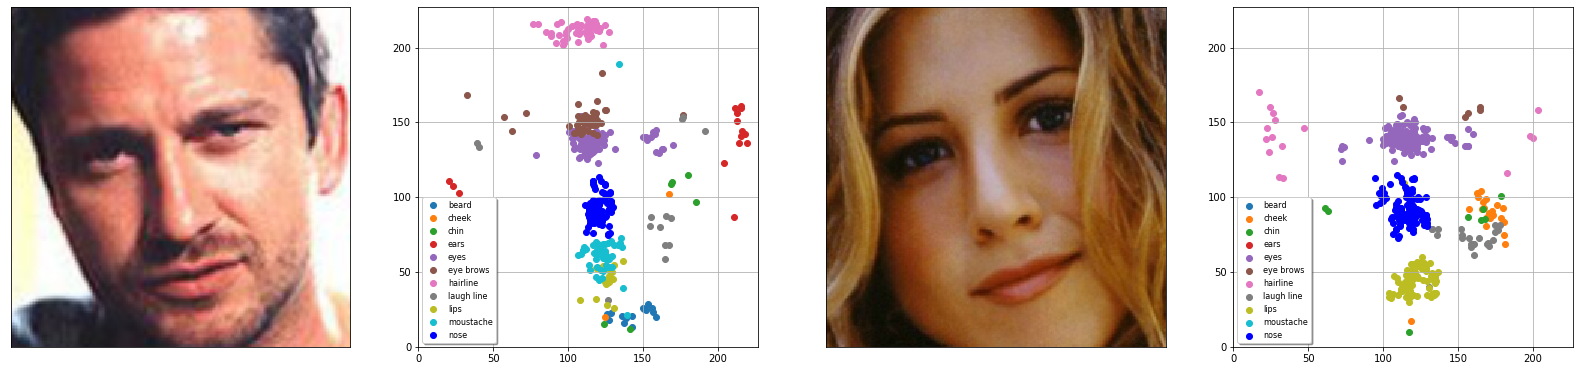

In [77]:
fig, axs = plt.subplots(1, 4, figsize=(28,7))

star = "Butler"

# plot an example of the test image
axs[0].imshow(faces[star][12]/255.)
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)

# plot bbox centres
ax = axs[1]
ax.set_aspect('equal')
for label in labels:
    selected_rows = data.loc[(data.last_name==star) & (data.label==label)]
    ax.scatter(selected_rows["b1"]+selected_rows["b3"]/2, 
               227-selected_rows["b0"]-selected_rows["b2"]/2, label=label,  color= color_map[label])
    ax.set_xlim([0, 227])
    ax.set_ylim([0, 227])
ax.grid(True)
ax.legend(loc='lower left', prop={'size': 8},
          ncol=1, fancybox=True, shadow=True)

star = "Aniston"

# plot an example of the test image
axs[2].imshow(faces[star][11]/255.)
axs[2].get_xaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)

# plot bbox centres
ax = axs[3]
ax.set_aspect('equal')
for label in labels:
    selected_rows = data.loc[(data.last_name==star) & (data.label==label)]
    ax.scatter(selected_rows["b1"]+selected_rows["b3"]/2, 
               227-selected_rows["b0"]-selected_rows["b2"]/2, label=label, color=color_map[label])
    ax.set_xlim([0, 227])
    ax.set_ylim([0, 227])
ax.grid(True)
ax.legend(loc='lower left', prop={'size': 8},
          ncol=1, fancybox=True, shadow=True)

In [78]:
fig.savefig("faceplot.pdf", pad_inches=0.0, bbox_inches = 'tight')

In [105]:
counts_all = []
for star in stars:
    counts = np.array([data[(data["last_name"]==star) & (data["label"]== lab)].shape[0] for lab in labels])
    counts = counts/counts.sum()
    counts_all.append(counts)
counts_all = np.stack(counts_all).mean(axis=0)

In [122]:
meanmaps = {}
for rowx in data.iterrows():
    row=rowx[1]
    star = row["last_name"]
    if star not in meanmaps:
        meanmaps[star] = np.zeros((227, 227))
    meanmaps[star][row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1

for star in meanmaps:
    meanmaps[star] = meanmaps[star]/(data[data["last_name"]==star].shape[0])

meanmap = np.stack(list(meanmaps.values())).mean(axis=0)

In [123]:
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "b"]
color_map = {}
for i,label in enumerate(labels):
    color_map[label] = colors[i]

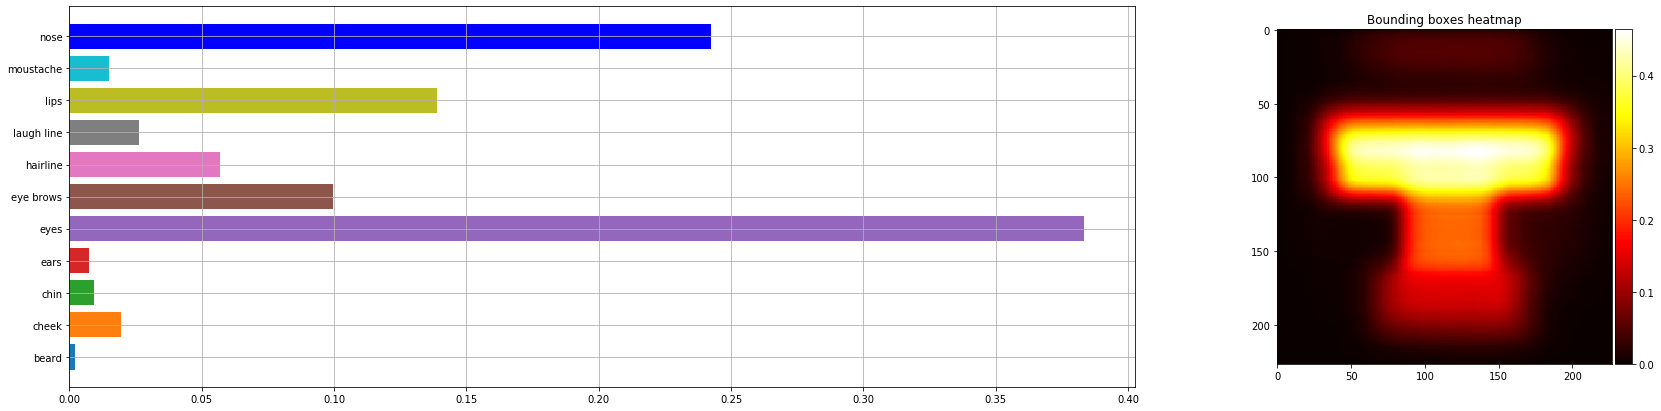

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(28,7), gridspec_kw={'width_ratios': [3, 1]})
ax = axs[0]
ax.barh(labels, counts_all, color=colors)
ax.grid()

ax = axs[1]
pos=ax.imshow(meanmap, cmap='hot', vmin=0.0)
ax.set_title("Bounding boxes heatmap")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(pos, ax=ax, cax=cax)

Text(0.5, -0.1, '(e)')

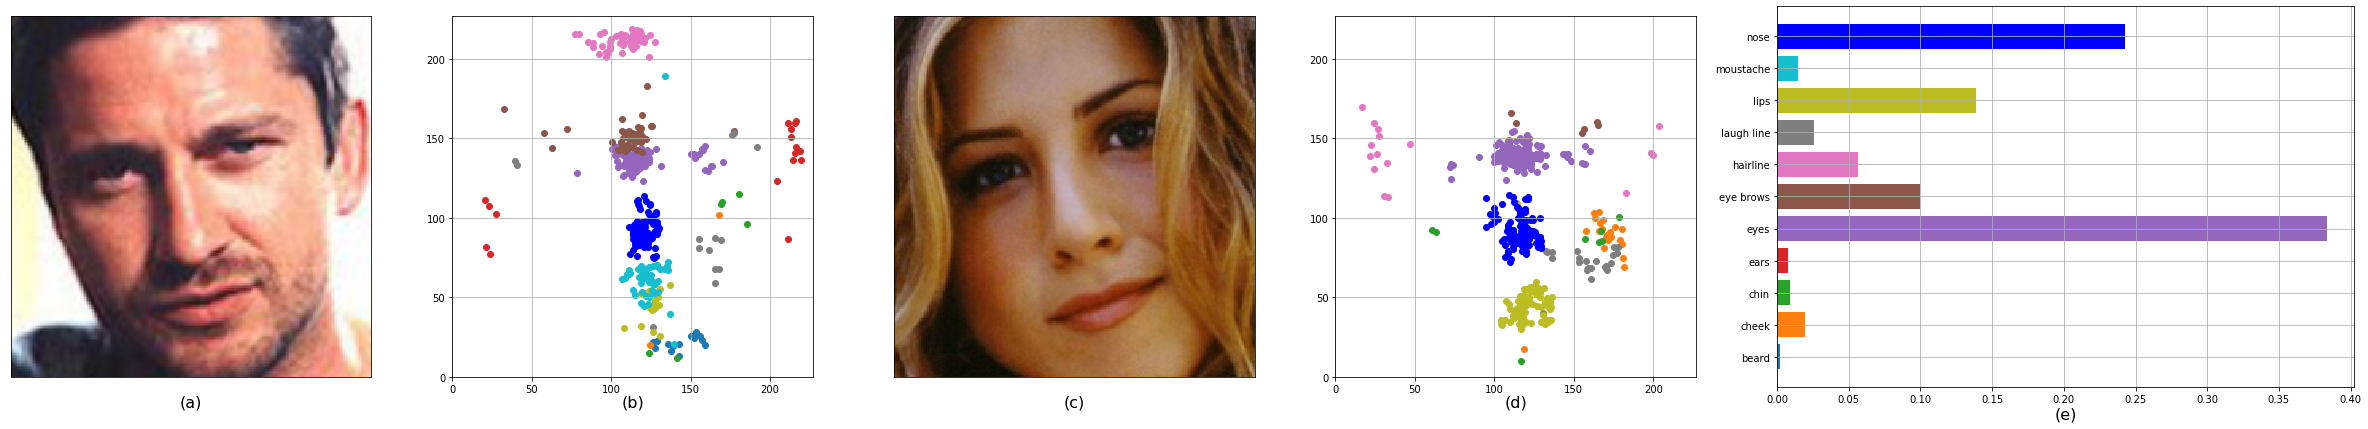

In [149]:
fig, axs = plt.subplots(1, 5, figsize=(42,7), gridspec_kw={'width_ratios': [1,1,1,1,1.6]})

star = "Butler"

# plot an example of the test image
axs[0].imshow(faces[star][12]/255.)
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[0].set_title("(a)", y=-0.1, fontsize=16)

# plot bbox centres
ax = axs[1]
ax.set_aspect('equal')
for label in labels:
    selected_rows = data.loc[(data.last_name==star) & (data.label==label)]
    ax.scatter(selected_rows["b1"]+selected_rows["b3"]/2, 
               227-selected_rows["b0"]-selected_rows["b2"]/2, label=label,  color= color_map[label])
    ax.set_xlim([0, 227])
    ax.set_ylim([0, 227])
ax.grid(True)
ax.set_title("Bounding box centres")
ax.set_title("(b)", y=-0.1, fontsize=16)

star = "Aniston"

# plot an example of the test image
axs[2].imshow(faces[star][11]/255.)
axs[2].get_xaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)
axs[2].set_title("(c)", y=-0.1, fontsize=16)

# plot bbox centres
ax = axs[3]
ax.set_aspect('equal')
for label in labels:
    selected_rows = data.loc[(data.last_name==star) & (data.label==label)]
    ax.scatter(selected_rows["b1"]+selected_rows["b3"]/2, 
               227-selected_rows["b0"]-selected_rows["b2"]/2, label=label, color=color_map[label])
    ax.set_xlim([0, 227])
    ax.set_ylim([0, 227])
ax.grid(True)
ax.set_title("Bounding box centres")
ax.set_title("(d)", y=-0.1, fontsize=16)

ax = axs[4]
ax.barh(labels, counts_all, color=colors)
ax.grid()
ax.set_title("Normalized distribution of facial feature labels")
ax.set_title("(e)", y=-0.1, fontsize=16)



In [150]:
fig.savefig("faceplot.pdf", pad_inches=0.0, bbox_inches = 'tight')

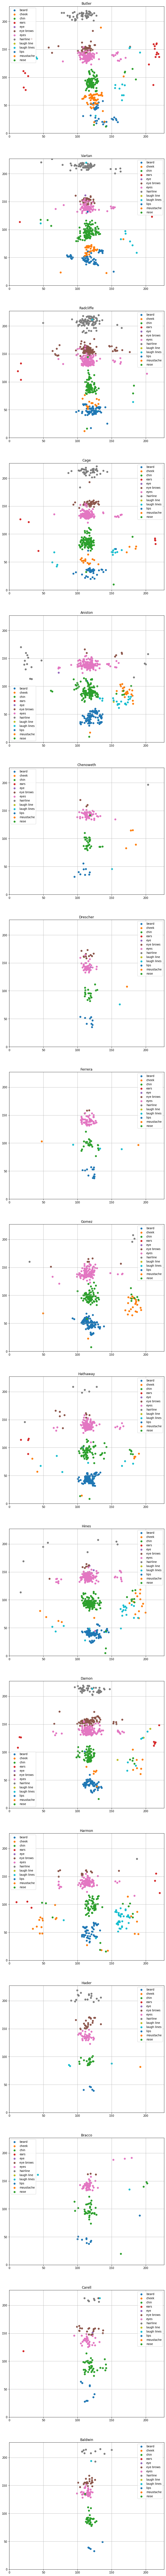

In [89]:
fig, axs = plt.subplots(17, figsize=(10,170))
for i, star in enumerate(stars):
    ax = axs[i]
    for label in labels:
        selected_rows = data.loc[(data.last_name==star) & (data.label==label)]
        ax.scatter(selected_rows["b1"]+selected_rows["b3"]/2, 
                   227-selected_rows["b0"]-selected_rows["b2"]/2, label=label)
    ax.set_xlim([0, 227])
    ax.set_ylim([0, 227])
    ax.set_title(star)
    ax.legend()
    ax.grid(True)

In [61]:
plt.close()